Vamos a utilizar un conjunto de datos de California que ya está en la biblioteca de scikit-learn, el cual contiene información sobre el precio de la vivienda en California

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from sklearn.datasets import load_boston
#boston_data = load_boston()
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
# Vamos a incluir los precios en el mismo conjunto de datos que las características
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["prices"] = housing.target

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
# Número de filas y columnas del dataset importado
df.shape

(20640, 9)

In [8]:
# Los nombres de las variables
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'prices'],
      dtype='object')

**Descripción de las variables:**
1.	CRIM: Índice de criminalidad per cápita por ciudad
2.	ZN: Proporción de suelo residencial con lotes de más de 25.000 pies cuadrados
3.	INDUS: Proporción de hectáreas de negocios no comerciales por ciudad
4.	CHAS: Variable ficticia del río Charles (= 1 si la zona linda con el río; 0 en caso contrario)
5.	NOX: Concentración de óxido nítrico en partes por 10 millones
6.	RM: Número medio de habitaciones
7.	AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8.	DIS: Distancias ponderadas a cinco centros de empleo de Boston
9.	RAD: Índice de accesibilidad a las autopistas radiales
10.	TAX: Tasa de impuesto sobre la propiedad por 10.000 dólares
11.	PTRATIO: Ratio de alumnos por profesor por ciudad
12.	B: 1000(Bk - 0,63)2, donde Bk es la proporción de personas de origen afroamericano por ciudad
13.	LSTAT: Porcentaje del estatus más bajo de la población
14.	prices: Los precios de las viviendas en miles de dólares

In [9]:
# Revisamos si el dataset contiene missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
prices        0
dtype: int64

In [2]:
import seaborn as sns
sns.set_theme()

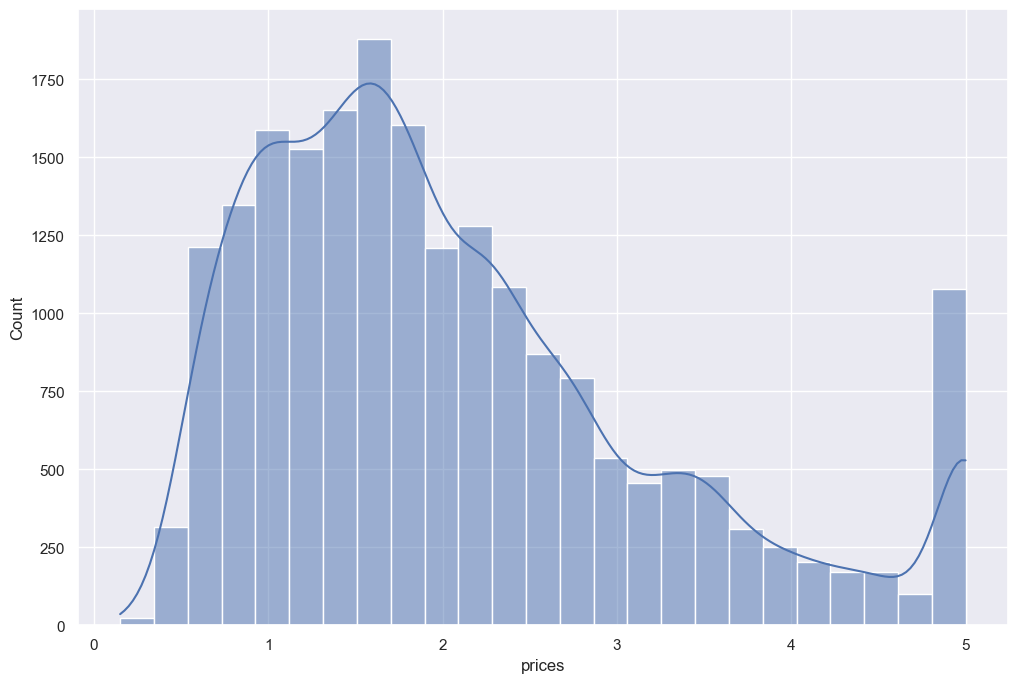

In [10]:
# Visualizamos la distribución de la variable dependiente
custom_param = {'figure.figsize': (12, 8)}
sns.set_theme(rc=custom_param)
sns.histplot(df["prices"], bins=25, kde = True)
plt.show()

**Véase:** [seaborn.set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

**Véase:** [seaborn.set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

## Matriz de correlación
Una matriz de correlación es una tabla que indica los coeficientes de conexión entre los factores. Cada celda de la tabla muestra la conexión entre los dos factores.
Por ejemplo, es posible que queramos comprender la relación entre la cantidad de horas que estudia un estudiante y la puntuación del examen que recibe.

Una forma de cuantificar esta relación es utilizar el coeficiente de correlación de Pearson , que es una medida de la asociación lineal entre dos variables .Tiene un valor entre -1 y 1 donde:

    -1 indica una correlación lineal perfectamente negativa entre dos variables
    0 indica que no hay correlación lineal entre dos variables
    1 indica una correlación lineal perfectamente positiva entre dos variables

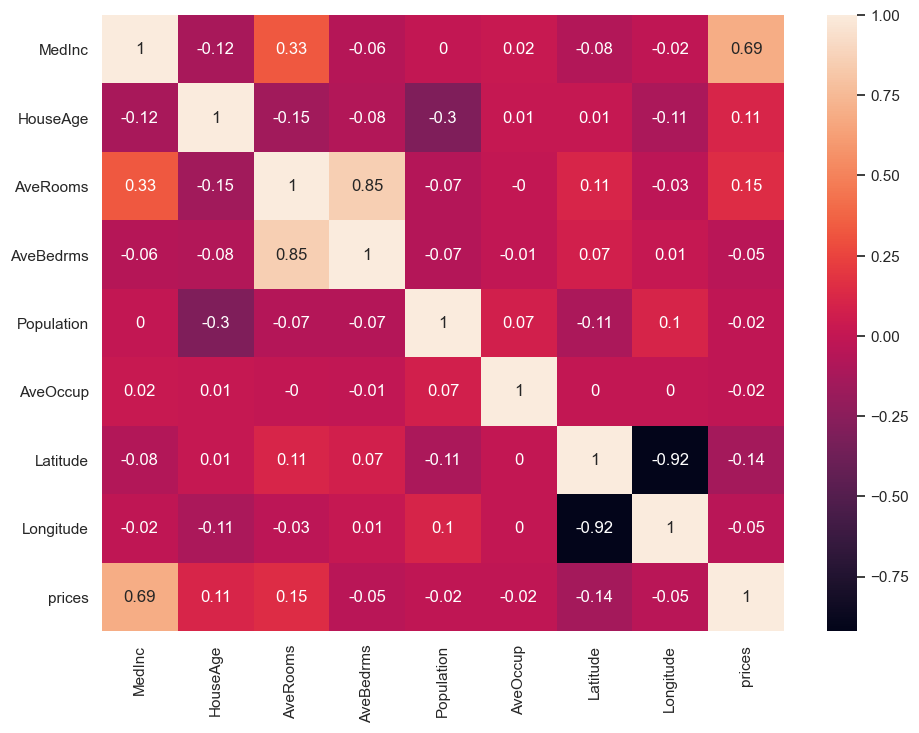

In [11]:
# Matriz de correlación
correlation_matrix = df.corr().round(2) # pd.corr() Calcule la correlación por pares de columnas, excluyendo NA/valores nulos.
sns.set_theme(rc={'figure.figsize':(11, 8)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Ahora, verifique la correlación entre la variable objetivo `prices` y las variables predictoras de nuestra elección (RM, CRIM, DIS, AGE y PTRATIO) de la matriz de correlación anterior.
En la imagen se muestra que el coeficiente de correlación entre `prices` y `RM` es `-0,7`, que es una fuerte correlación positiva. El coeficiente de correlación entre `Population` y `HouseAge` es `-0.3` que es una correlación negativa significativa. Los coeficientes de correlación entre `Prices` y `MedInc` es `0.69`, lo que indica correlaciones bastante significativa.

Estoy eligiendo dos variables predictoras basadas en las correlaciones de la matriz_correlación. Aquí estoy tomando `AveRooms` y `Prices` que tienen una buena correlación positiva con `MedInc`.

**Véase:** [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0, 0.5, 'prices')

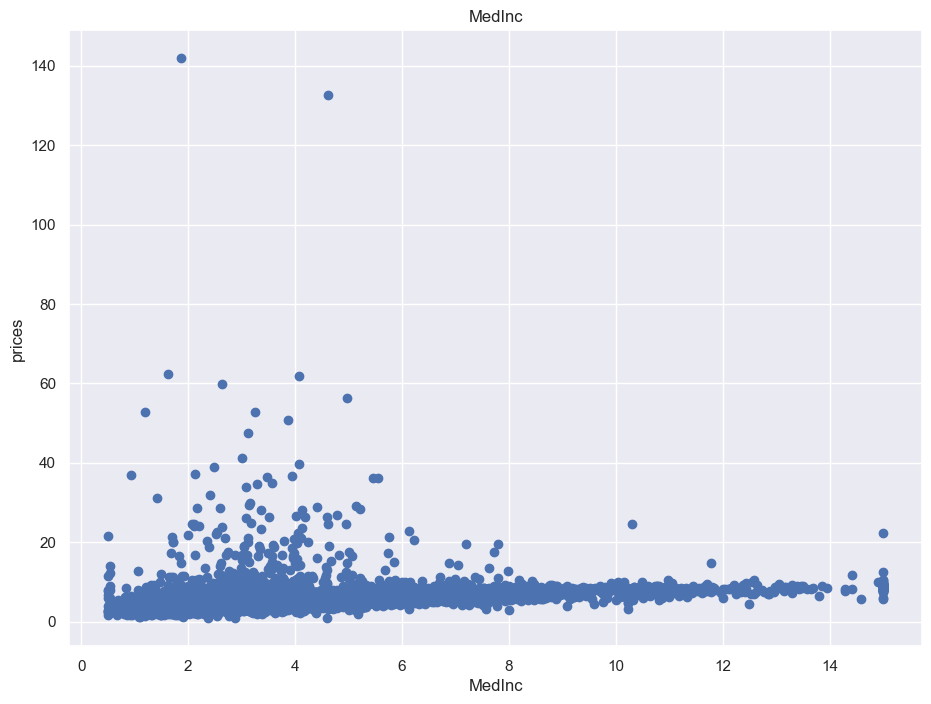

In [13]:
x = df['MedInc']
y = df['AveRooms']
plt.scatter(x, y, marker='o')
plt.title("MedInc")
plt.xlabel("MedInc")
plt.ylabel('prices')

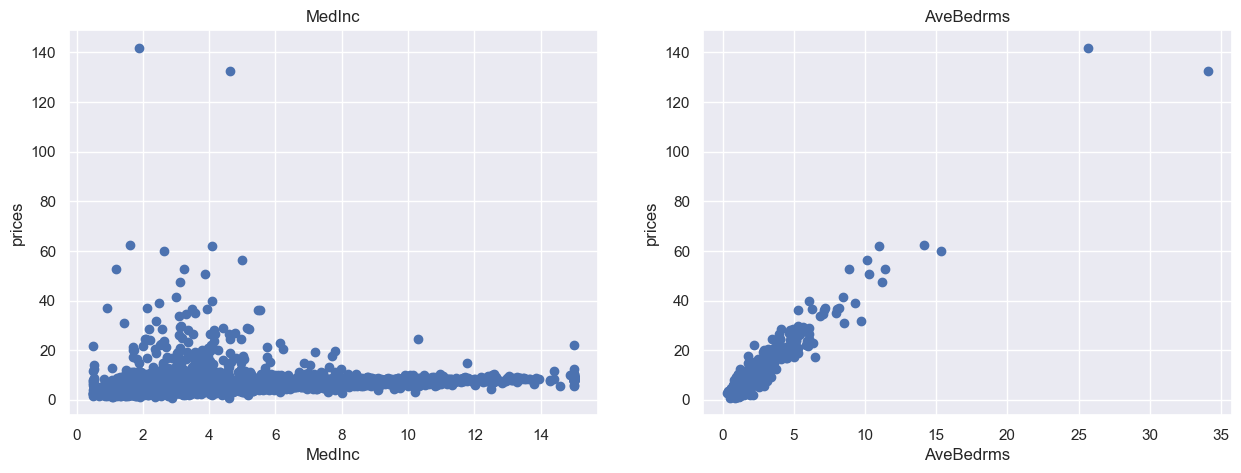

In [14]:
# Gráfico de dispersión
plt.figure(figsize=(15, 5))
features = ['MedInc', 'AveBedrms']
target = df['AveRooms']
for i, col in enumerate(features):
  plt.subplot(1, len(features) , i+1)
  x = df[col]
  y = target
  plt.scatter(x, y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('prices')

Del diagrama de dispersión anterior, podemos ver que la distribución de `AveRooms` está sesgada hacia la la derecha y la distribución de `prices` está sesgada hacia la izquierda. Pero si pensamos en un modelo lineal, deberíamos manipular los datos para que la relación sea más lineal. Cuando los datos están sesgados hacia la izquierda una forma de transformar los datos es tomar cubos de datos. Y cuando está sesgado a la derecha, tomar un `log` ayuda. Recordamos que el sesgo de da cuando la cola de la distribución se encuentra solo hacia un lado del plot.

In [ ]:
# Transformación de los datos para un mejor modelado
plt.figure(figsize=(20, 5))
df['MedIncN'] = np.log(df['MedInc'])
df['AveBedrmsN'] = np.log(df['AveBedrms'])
features = ['MedIncN', 'AveBedrmsN']
target = df['AveRooms']
for i, col in enumerate(features):
  plt.subplot(1, len(features) , i+1)
  x = df[col]
  y = target
  plt.scatter(x, y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('prices')

In [ ]:
sns.lmplot(data=df, x='MedIncN', y='AveRooms')

In [ ]:
sns.lmplot(data=df, x='AveBedrmsN', y='MedInc')

**Fuente:** [Exploratory Data Analysis For Data Modeling](https://regenerativetoday.com/exploratory-data-analysis-for-data-modeling/)